# ANALISIS EXPLORATORIO DE LOS DATOS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

## I. ANALIZAMOS NUESTROS DATOS

In [2]:
#Creamos un dataframe
df_udemy = pd.read_csv('./Data transformada/udemy/dataudemycompleta.csv', sep=',')

In [3]:
#Veamos la cantidad de filas y columnas
df_udemy.shape

(3676, 12)

In [4]:
#Veamos la información de los datos
df_udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3676 entries, 0 to 3675
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nombre_curso       3676 non-null   object 
 1   price(USD)         3676 non-null   float64
 2   cant_suscriptores  3676 non-null   int64  
 3   cant_opiniones     3676 non-null   int64  
 4   cant_lecciones     3676 non-null   int64  
 5   nivel              3676 non-null   object 
 6   valoracion         3676 non-null   float64
 7   duracion_curso     3676 non-null   float64
 8   categoria          3676 non-null   object 
 9   Free/Paid          3676 non-null   object 
 10  fecha_curso        3676 non-null   object 
 11  año                3676 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 344.8+ KB


In [5]:
#Visualizamos
df_udemy.head()

,nombre_curso,price(USD),cant_suscriptores,cant_opiniones,cant_lecciones,nivel,valoracion,duracion_curso,categoria,Free/Paid,fecha_curso,año
0,Bitcoin or How I Learned to Stop Worrying and ...,0.0,65576,936,24,Mixto,2.80,8.0,Negocios y Finanzas,Free,2013-04-20,2013
1,Accounting in 60 Minutes - A Brief Introduction,0.0,56659,4397,16,Principiante,4.75,1.5,Negocios y Finanzas,Free,2013-04-07,2013
2,Stock Market Investing for Beginners,0.0,50855,2698,15,Mixto,4.55,1.5,Negocios y Finanzas,Free,2013-12-25,2013
3,Introduction to Financial Modeling,0.0,29167,1463,8,Mixto,0.90,1.5,Negocios y Finanzas,Free,2014-05-27,2014
4,The Complete Financial Analyst Course 2017,195.0,24481,2347,174,Mixto,1.85,10.0,Negocios y Finanzas,Paid,2016-01-21,2016


In [6]:
#Vamos a crear una nueva columna de nombre recaudacion(USD)
df_udemy['recaudacion_curso(USD)'] = df_udemy['price(USD)']*df_udemy['cant_suscriptores']

In [8]:
#Visualizamos
df_udemy.head(3)

,nombre_curso,price(USD),cant_suscriptores,cant_opiniones,cant_lecciones,nivel,valoracion,duracion_curso,categoria,Free/Paid,fecha_curso,año,recaudacion_curso(USD)
0,Bitcoin or How I Learned to Stop Worrying and ...,0.0,65576,936,24,Mixto,2.80,8.0,Negocios y Finanzas,Free,2013-04-20,2013,0.0
1,Accounting in 60 Minutes - A Brief Introduction,0.0,56659,4397,16,Principiante,4.75,1.5,Negocios y Finanzas,Free,2013-04-07,2013,0.0
2,Stock Market Investing for Beginners,0.0,50855,2698,15,Mixto,4.55,1.5,Negocios y Finanzas,Free,2013-12-25,2013,0.0


In [9]:
#Veamos las estadisticas de los datos
df_udemy.describe().round(1)

,price(USD),cant_suscriptores,cant_opiniones,cant_lecciones,valoracion,duracion_curso,año,recaudacion_curso(USD)
count,3676.0,3676.0,3676.0,3676.0,3676.0,3676.0,3676.0,3676.0
mean,66.1,3199.3,156.3,40.1,3.1,4.1,2015.4,240794.3
std,61.1,9486.6,935.7,50.4,1.7,6.1,1.2,1001031.1
min,0.0,0.0,0.0,0.0,0.0,0.0,2011.0,0.0
25%,20.0,112.0,4.0,15.0,1.4,1.0,2015.0,1620.0
50%,45.0,912.5,18.0,25.0,3.8,2.0,2016.0,23250.0
75%,95.0,2558.0,67.0,46.0,4.6,4.5,2016.0,119343.8
max,200.0,268923.0,27445.0,779.0,5.0,78.5,2017.0,24316800.0


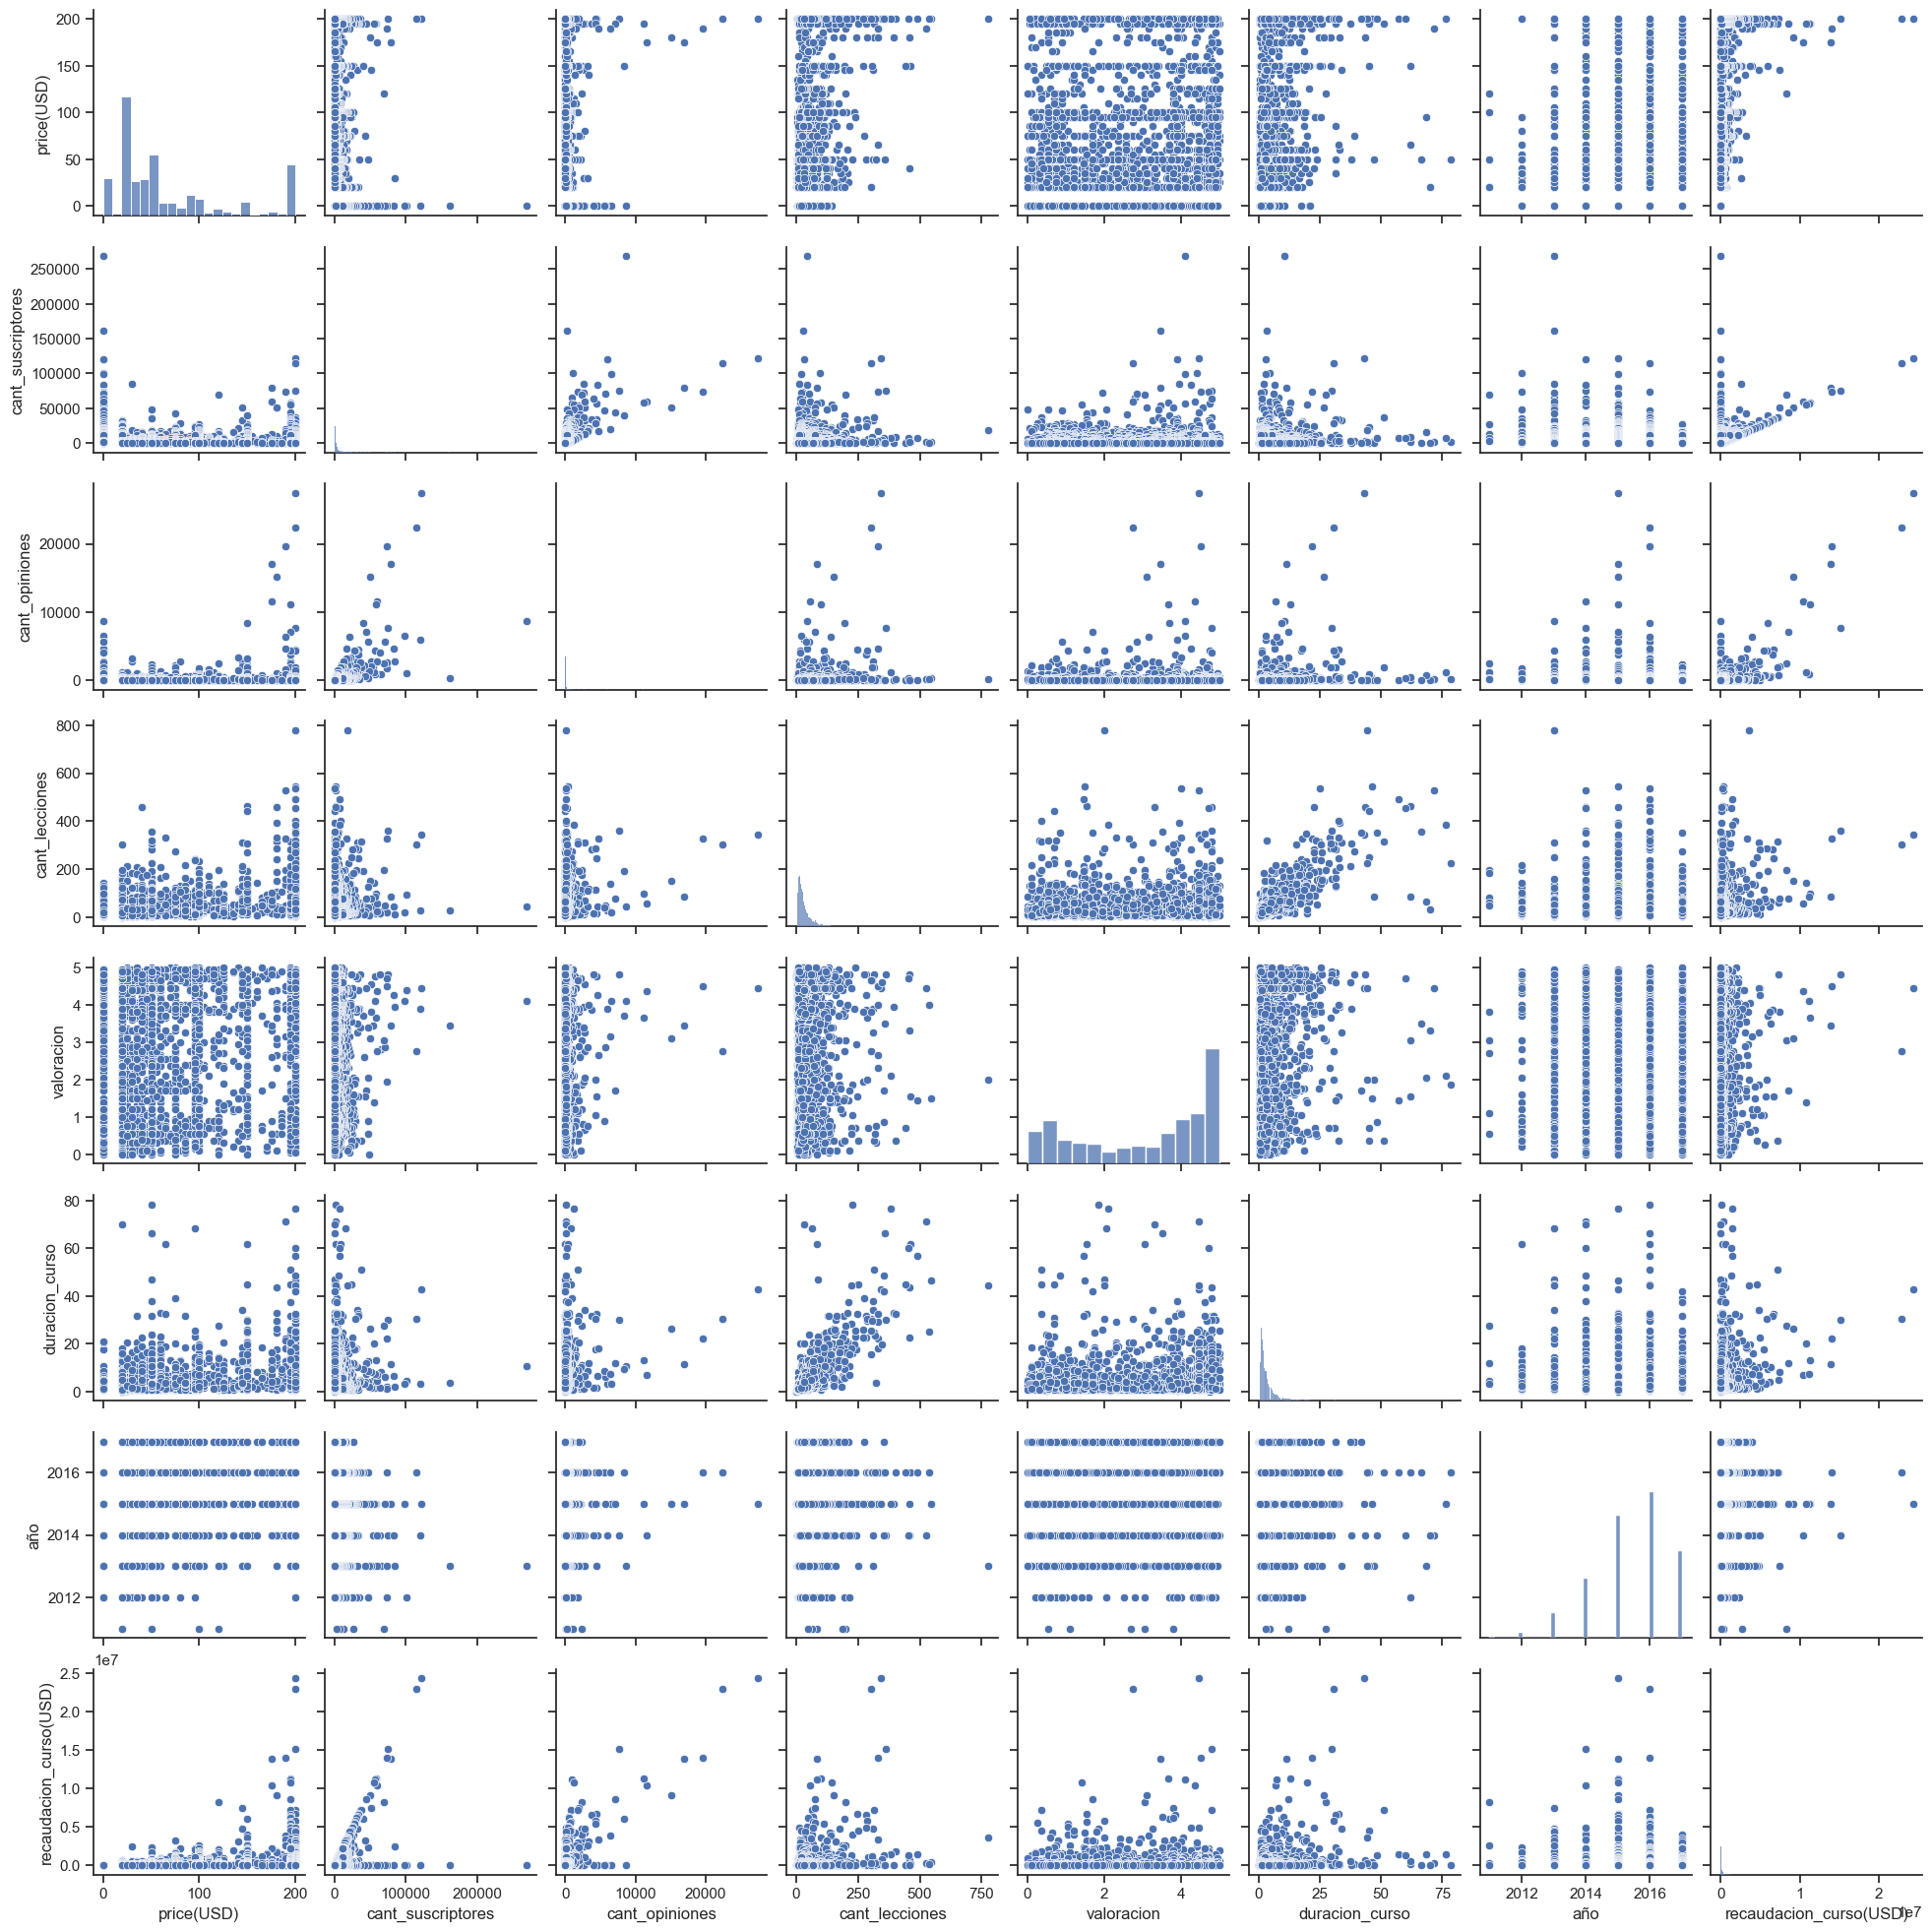

In [10]:
#Veamos graficamente la relación entre las columnas
sns.set(style="ticks")
sns.pairplot(df_udemy)
plt.show()

In [11]:
#Veamos un dataframe de correlacion de las columnas
correlacion_udemy = df_udemy.corr(numeric_only=True)
correlacion_udemy

,price(USD),cant_suscriptores,cant_opiniones,cant_lecciones,valoracion,duracion_curso,año,recaudacion_curso(USD)
price(USD),1.000000,0.050555,0.113423,0.330233,0.031643,0.293245,0.134875,0.347614
cant_suscriptores,0.050555,1.000000,0.650761,0.158092,-0.007353,0.161844,-0.182635,0.555737
cant_opiniones,0.113423,0.650761,1.000000,0.242986,0.004137,0.228842,-0.053045,0.770030
cant_lecciones,0.330233,0.158092,0.242986,1.000000,-0.037170,0.801630,-0.024659,0.322481
valoracion,0.031643,-0.007353,0.004137,-0.037170,1.000000,0.000650,0.059683,-0.011473
duracion_curso,0.293245,0.161844,0.228842,0.801630,0.000650,1.000000,-0.058449,0.296945
año,0.134875,-0.182635,-0.053045,-0.024659,0.059683,-0.058449,1.000000,-0.056356
recaudacion_curso(USD),0.347614,0.555737,0.770030,0.322481,-0.011473,0.296945,-0.056356,1.000000


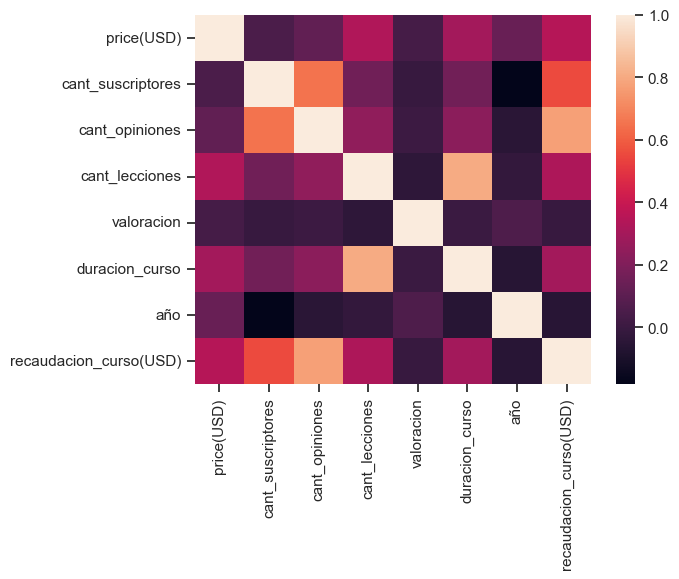

In [12]:
#Veamos en un mapa de calor dichas correlaciones
sns.heatmap(correlacion_udemy)
plt.show()

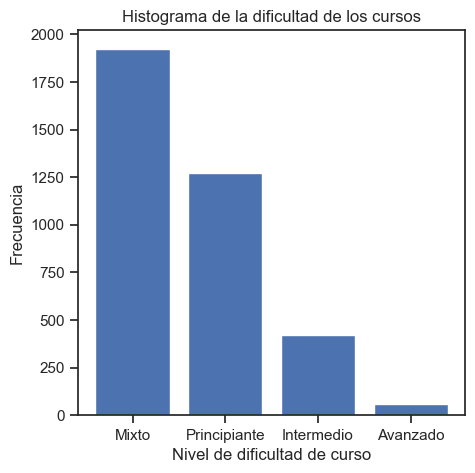

In [14]:
#Contar las ocurrencias de cada categoría en la columna
counts = df_udemy['nivel'].value_counts()

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(5, 5))

x = range(len(counts))

ax.bar(x, counts)

# Personalizar el gráfico
ax.set_xticks(x)
ax.set_xticklabels(counts.index)
ax.set_xlabel('Nivel de dificultad de curso')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de la dificultad de los cursos')

plt.show()

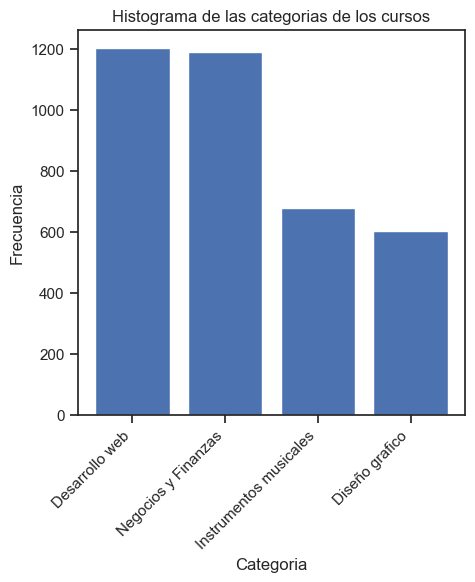

In [16]:
#Contar las ocurrencias de cada categoría en la columna
counts = df_udemy['categoria'].value_counts()

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(5, 5))

x = range(len(counts))

ax.bar(x, counts)

# Personalizar el gráfico
ax.set_xticks(x)
ax.set_xticklabels(counts.index)
ax.set_xticklabels(counts.index, rotation=45, ha='right')
ax.set_xlabel('Categoria')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de las categorias de los cursos')

plt.show()

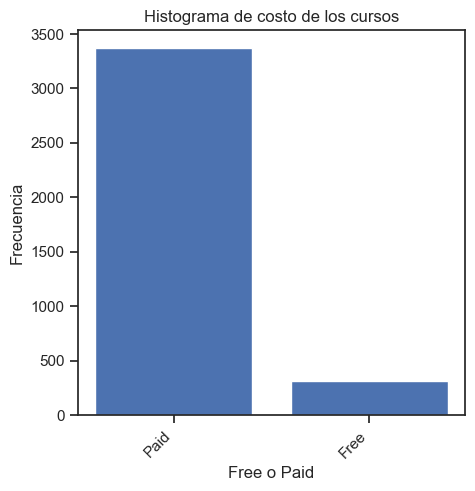

In [17]:
#Contar las ocurrencias de cada categoría en la columna
counts = df_udemy['Free/Paid'].value_counts()

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(5, 5))

x = range(len(counts))

ax.bar(x, counts)

# Personalizar el gráfico
ax.set_xticks(x)
ax.set_xticklabels(counts.index)
ax.set_xticklabels(counts.index, rotation=45, ha='right')
ax.set_xlabel('Free o Paid')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de costo de los cursos')

plt.show()

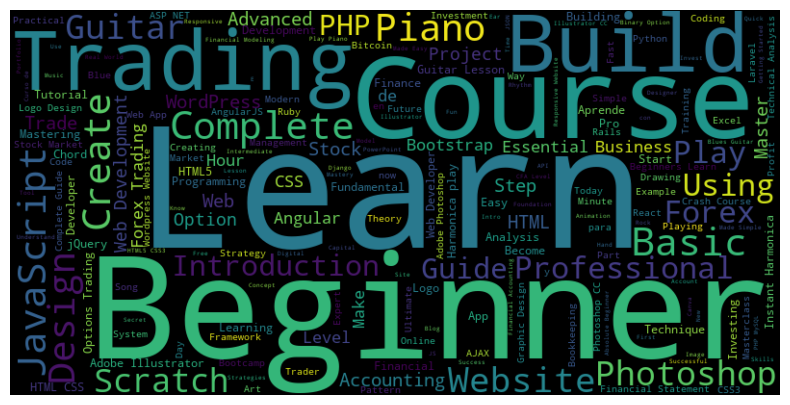

In [18]:
#Veamos que palabras son las más recurrentes en los nombres de los cursos
# Combinamos los nombres de los cursos en un solo texto
texto = ' '.join(df_udemy['nombre_curso'])

# Configuramos las stopwords (palabras a ignorar en la nube de palabras)
stopwords = set(STOPWORDS)

# Creamos una instancia de WordCloud y generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, stopwords=stopwords)
wordcloud.generate_from_text(texto)

# Configuramos el tamaño de la figura y mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
#Veanos la informacion
df_udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3676 entries, 0 to 3675
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nombre_curso            3676 non-null   object 
 1   price(USD)              3676 non-null   float64
 2   cant_suscriptores       3676 non-null   int64  
 3   cant_opiniones          3676 non-null   int64  
 4   cant_lecciones          3676 non-null   int64  
 5   nivel                   3676 non-null   object 
 6   valoracion              3676 non-null   float64
 7   duracion_curso          3676 non-null   float64
 8   categoria               3676 non-null   object 
 9   Free/Paid               3676 non-null   object 
 10  fecha_curso             3676 non-null   object 
 11  año                     3676 non-null   int64  
 12  recaudacion_curso(USD)  3676 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 373.5+ KB


## II. PLANTEAMOS ALGUNAS PREGUNTAS

a. ¿Cuál es el top 5 de los cursos con mayor precio por nivel de dificultad?

In [22]:
# Filtrar los cursos que tienen nivel "principiante"
df_principiante = df_udemy[df_udemy['nivel'] == 'Principiante']

# Ordenar los cursos filtrados por rating de forma descendente y obtener los 5 primeros
df_top_5_principiante = df_principiante.sort_values('price(USD)', ascending=False).head(5)

# Obtener las columnas requeridas
df_top_5_principiante = df_top_5_principiante[['nombre_curso', 'nivel', 'price(USD)']]
df_top_5_principiante

,nombre_curso,nivel,price(USD)
3675,Learning Path: Web Applications with Spring an...,Principiante,200.0
2897,Angular 4: From Theory to Practice & FREE E-Book,Principiante,200.0
1138,Coaching Course:Investment Analysis for your c...,Principiante,200.0
2875,Complete Login and Registration System in PHP ...,Principiante,200.0
3519,Shopping Cart Website from Scratch Ecommerce,Principiante,200.0


In [24]:
# Filtrar los cursos que tienen nivel "intermedio"
df_intermedio = df_udemy[df_udemy['nivel'] == 'Intermedio']

# Ordenar los cursos filtrados por rating de forma descendente y obtener los 5 primeros
df_top_5_intermedio = df_intermedio.sort_values('price(USD)', ascending=False).head(5)

# Obtener las columnas requeridas
df_top_5_intermedio = df_top_5_intermedio[['nombre_curso', 'nivel', 'price(USD)']]
df_top_5_intermedio

,nombre_curso,nivel,price(USD)
3657,Learning Path: Magento: Master and Test Magent...,Intermedio,200.0
246,Investing: How I Consistently Beat The Stock M...,Intermedio,200.0
201,Forex Traders - Create Your First Trading Robo...,Intermedio,200.0
1836,Learn to Play Piano From a Concert Pianist - F...,Intermedio,200.0
1810,Quicklessons Piano Course - Learn to Play Pian...,Intermedio,200.0


In [25]:
# Filtrar los cursos que tienen nivel "avanzado"
df_avanzado = df_udemy[df_udemy['nivel'] == 'Avanzado']

# Ordenar los cursos filtrados por rating de forma descendente y obtener los 5 primeros
df_top_5_avanzado = df_avanzado.sort_values('price(USD)', ascending=False).head(5)

# Obtener las columnas requeridas
df_top_5_avanzado = df_top_5_avanzado[['nombre_curso', 'nivel', 'price(USD)']]
df_top_5_avanzado

,nombre_curso,nivel,price(USD)
223,Ultimate Investment Banking Course,Avanzado,200.0
259,Stock Market Option Trading: How Sell Options ...,Avanzado,200.0
3431,Scrape Websites using PhantomJS and CasperJS,Avanzado,195.0
888,"Internal Controls - Design, Implementation and...",Avanzado,195.0
40,Algorithmic Trading In Forex: Create Your Firs...,Avanzado,185.0


b. ¿Cual es el top 5 de cursos de la categoria desarrollo web con mayor cantidad de suscriptores?

In [26]:
df_coursera_web = df_udemy[df_udemy['categoria'] == 'Desarrollo web']
df_top_5_desarrollo = df_coursera_web.sort_values('cant_suscriptores', ascending=False).head(5)
df_top_5_desarrollo  = df_top_5_desarrollo[['nombre_curso', 'nivel', 'categoria', 'cant_suscriptores']]
df_top_5_desarrollo

,nombre_curso,nivel,categoria,cant_suscriptores
2473,Learn HTML5 Programming From Scratch,Principiante,Desarrollo web,268923
2474,Coding for Entrepreneurs Basic,Avanzado,Desarrollo web,161029
2475,The Web Developer Bootcamp,Principiante,Desarrollo web,121584
2476,Build Your First Website in 1 Week with HTML5 ...,Mixto,Desarrollo web,120291
2477,The Complete Web Developer Course 2.0,Principiante,Desarrollo web,114512


c. ¿Cuales son los cursos que menos cantidad de opiniones tienen en el nivel avanzado?

In [29]:
# Filtramos los cursos que tienen nivel "Avanzado"
df_avanzado_op = df_udemy[df_udemy['nivel'] == 'Avanzado']

# Ordenemos los cursos filtrados por rating de forma descendente y obtener los 5 primeros
df_opiniones_avanzado = df_avanzado_op.sort_values('cant_opiniones', ascending=False).tail(3)

# Obtenemos las columnas requeridas
df_opiniones_avanzado = df_opiniones_avanzado[['nombre_curso', 'nivel', 'cant_opiniones']]
df_opiniones_avanzado

,nombre_curso,nivel,cant_opiniones
2231,What you can learn before Piano Lessons,Avanzado,1
1001,Five steps to becoming a winner in stock inves...,Avanzado,1
1146,Financial Market Environment & Investment Stra...,Avanzado,0


Rpta: Financial Market Environment & Investment Stra...	no tiene ninguna opinion.

d. ¿Cuantos alumnos en total hay inscritos en cursos de nivel principiante, intermedio y avanzado por cada nivel?

In [30]:
# Filtrar los cursos que tienen nivel "principiante"
principiante = df_udemy[df_udemy['nivel'] == 'Principiante']
df_cant_principiantes = principiante['cant_suscriptores'].sum()
df_cant_principiantes

4142544

In [31]:
# Filtrar los cursos que tienen nivel "intermedio"
intermedio = df_udemy[df_udemy['nivel'] == 'Intermedio']
df_cant_intermedio = intermedio['cant_suscriptores'].sum()
df_cant_intermedio

1077459

In [32]:
# Filtrar los cursos que tienen nivel "avanzado"
avanzado = df_udemy[df_udemy['nivel'] == 'Avanzado']
df_cant_avanzado = avanzado['cant_suscriptores'].sum()
df_cant_avanzado

280111

e. En el caso de los cursos de nivel avanzado, ¿cual es el promedio de valoracion?

In [35]:
#Veamos la cantidad de especializaciones
avanzado['valoracion'].mean().round(2)

2.95

f. De los cursos mixtos, ¿cual es el curso con mayor duracion?

In [48]:
df_mixto = df_udemy[df_udemy['nivel'] == 'Mixto']
df_ordenado = df_mixto.sort_values('duracion_curso', ascending=False)
df_ordenado[['nombre_curso', 'duracion_curso']].max()

nombre_curso      财务分析与估值建模入门
duracion_curso           76.5
dtype: object

## III. CONCLUSIONES

- Vemos que hay una fuerte correlacion entre la recaudacion del curso y la cantidad de opiniones.

- La mayor cantidad de cursos tienen un nivel de dificultad mixto y principiante.

- La mayor cantidad de cursos son de la categoria desarrollo web y negocios y finanzas.

- La mayor cantidad de cursos son de pago.

- Las palabras mas comumente utilizadas en los nombres de los cursos son learn y beginner.

- El top 5 de cursos de nivel principiante en su mayoria son de desarrollo web y tienen un costo de 200 dolares, en el caso de los de nivel intermedio el top 5 se reparte entre cursos de musica y de inversiones, finalmente en el caso de los cursos de nivel avanzado son de inversiones.

- El curso de desarrollo web con mayor cantidad de suscritos es de nivel principiante.

- El curso de nivel avanzado que no tuvo ninguna opinion corresponde a inversiones.

- La categoria de cursos principiante es la que mas suscritos tuvo.

- El promedio de cursos de nivel avanzado es muy bajo, lo cual quiere decir que no son del agrado de los suscritos.

- El curso de mayor duracion tiene 76 horas de lecciones.
